## Import lib

In [1]:
from pyMSOO.MFEA.model import MFEA_base, SM_MFEA, LSA21
from pyMSOO.MFEA.competitionModel import SM_MFEA_Competition, MFEA_Multiparent
from pyMSOO.utils.Crossover import *
from pyMSOO.utils.Mutation import *
from pyMSOO.utils.Selection import *
from pyMSOO.utils.Search import * 
from pyMSOO.MFEA.benchmark.continous import *
from pyMSOO.utils.MultiRun.RunMultiTime import * 

from pyMSOO.utils.EA import * 
from pyMSOO.MFEA.benchmark.continous.CEC17 import CEC17_benchmark 
from pyMSOO.MFEA.benchmark.continous.WCCI22 import WCCI22_benchmark
from pyMSOO.MFEA.benchmark.continous.funcs import * 

from pyMSOO.utils.MultiRun.RunMultiTime import * 
from pyMSOO.utils.MultiRun.RunMultiBenchmark import * 
from pyMSOO.utils.Compare.compareModel import CompareModel

from pyMSOO.utils.LoadSaveModel.load_utils import loadModel, loadModelFromTxt

from pyMSOO.utils.numba_utils import *

from pyMSOO.utils.Compare.utils import render_cec_17

## Compare model

### Convergence trend

3


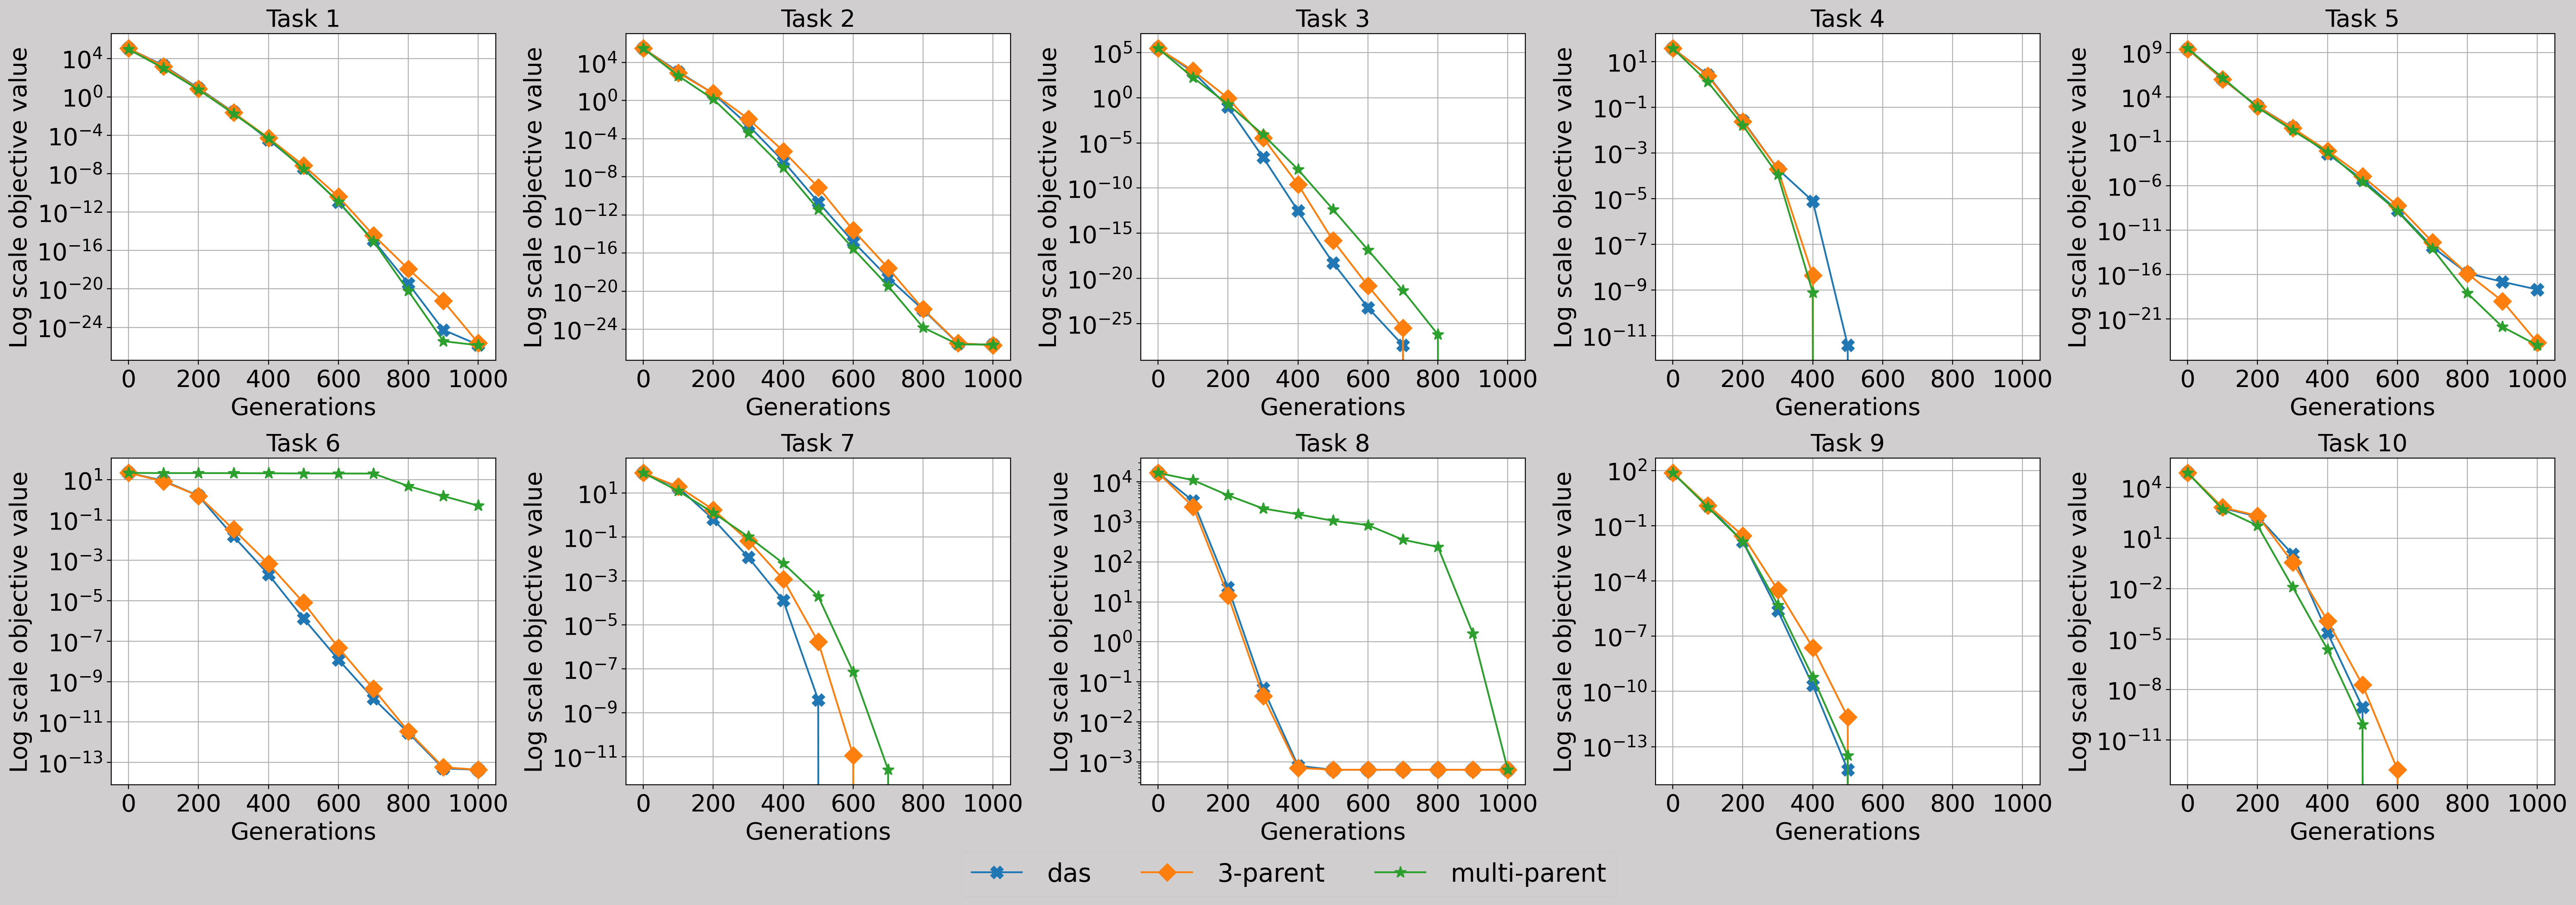

In [2]:

# fig = render_cec_17(
#     ls_model=[
#             loadModel("./Data/convergence_trend_das/S-MFEA_CEC17_PYTHON.mso",ls_tasks= CEC17_benchmark.get_10tasks_benchmark()[0]),
#             loadModel("./Data/convergence_trend_das/S-MFEA_KL_CEC17_PYTHON.mso",ls_tasks= CEC17_benchmark.get_10tasks_benchmark()[0]),
#             loadModel("./Data/convergence_trend_das/MaTGA_w_DaS.mso",ls_tasks= CEC17_benchmark.get_10tasks_benchmark()[0]),
#             loadModel("./Data/convergence_trend_das/MaTGA_wo_DaS.mso",ls_tasks= CEC17_benchmark.get_10tasks_benchmark()[0]),
#             loadModel("./Data/convergence_trend_das/SBSGA_w_DaS.mso",ls_tasks= CEC17_benchmark.get_10tasks_benchmark()[0]),
#             loadModel("./Data/convergence_trend_das/SBSGA_wo_DaSCEC17.mso",ls_tasks= CEC17_benchmark.get_10tasks_benchmark()[0]),
#             loadModel("./Data/convergence_trend_das/MFEA_KL_1.mso",ls_tasks= CEC17_benchmark.get_10tasks_benchmark()[0]),
#             loadModel("./Data/convergence_trend_das/MFEA_SBX_1.mso",ls_tasks= CEC17_benchmark.get_10tasks_benchmark()[0]),
#             loadModel("./Data/convergence_trend_das/LSA_KL_CEC17_PYTHON_1.mso",ls_tasks= CEC17_benchmark.get_10tasks_benchmark()[0]),
#             loadModel("./Data/convergence_trend_das/LSA_SBX_CEC17_JAVA_1.mso",ls_tasks= CEC17_benchmark.get_10tasks_benchmark()[0]),
#     ],
#     ls_label= [ '$\\bf{SM-MFEA}$', '$\\bf{SM-MFEA-DaS}$', "MaTGA-DaS", 'MaTGA', 'SBGA-DaS', 'SBGA', 'MFEA_DaS', 'MFEA', "LSA-DaS", "LSA",] 
# )

render_cec_17(
    ls_model=[
        loadModel("./RESULTS/result/GECCO20/check/SMP_MFEA_SBX_230523_1400/sm_mfea_sbx_das.mso",ls_tasks= CEC17_benchmark.get_10tasks_benchmark()[0]),
        loadModel("./RESULTS/result/GECCO20/check/SMP_MFEA_SBX_230523_1400/multiparent2023-5-29-14-13.mso",ls_tasks= CEC17_benchmark.get_10tasks_benchmark()[0]),
        loadModel("./RESULTS/result/GECCO20/check/MFEA_multiparent/multiparent-2023-5-30-15-11.mso",ls_tasks= CEC17_benchmark.get_10tasks_benchmark()[0]),
    ],
    ls_label=['das', '3-parent', 'multi-parent'],
    min_cost= 0
)
print()


### Compare final result 

In [4]:
path = "./RESULTS/MaTGA/"
compare = CompareModel() 

print(os.listdir(path))

['MaTGA_w_DaS', 'MaTGA']


In [ ]:
compare.summarizing_compare_result(
    path= path, 
    idx_main_algo= 0, 
    min_value= 1e-6, 
    nb_task = 50, 
    ls_benchmark= [WCCI22_benchmark.get_50tasks_benchmark(i)[0] for i in range(1, 11)]
)

## Run Model

In [6]:
ls_benchmark = []
ls_IndClass = []
ls_tasks = [1]
name_benchmark = [] 

for i in ls_tasks:
    # t, ic = WCCI22_benchmark.get_complex_benchmark(i)
    t, ic = WCCI22_benchmark.get_complex_benchmark(i)
    ls_benchmark.append(t)
    ls_IndClass.append(ic)
    name_benchmark.append(str(i))


smpModel = MultiBenchmark(
    ls_benchmark= ls_benchmark,
    name_benchmark= name_benchmark,
    ls_IndClass= ls_IndClass,
    model= SM_MFEA
)

smpModel.compile( 
    crossover = SBX_Crossover(nc = 2),
    mutation = PolynomialMutation(nm = 5, pm= 1),
    selection= ElitismSelection(random_percent= 0),
    search= L_SHADE(len_mem= 15),
    attr_tasks = ['crossover', 'mutation', 'search'],
)
smpModel.fit(
    nb_generations= 1000, nb_inds_each_task= 100, nb_inds_min= 20,
    lr = 0.1, p_const_intra= 0., prob_search = 0., lc_nums = 200,
    nb_epochs_stop= 1000, swap_po= False,
    evaluate_initial_skillFactor= True
)
a = smpModel.run(
    nb_run= 1,     
    save_path= './RESULTS/'
)

Seed: 0 -- Time: 00m 5.80s   16 % [===>                ]  Pop_size: 1.74E+02  ,  Cost: 6.24E+02  6.28E+02  ,  

KeyboardInterrupt: Saved model, model is not Done


Traceback (most recent call last):
  File "/home/anhdt-minhdt/Code/docker/pyMSOO/pyMSOO/utils/MultiRun/RunMultiTime.py", line 202, in run
    model.fit(*self.args, **self.kwargs)
  File "/home/anhdt-minhdt/Code/docker/pyMSOO/pyMSOO/MFEA/model/SM_MFEA.py", line 220, in fit
    offsprings.__addIndividual__(ob)
  File "/home/anhdt-minhdt/Code/docker/pyMSOO/pyMSOO/utils/EA.py", line 394, in __addIndividual__
    self.ls_subPop[individual.skill_factor].__addIndividual__(individual, update_rank)
  File "/home/anhdt-minhdt/Code/docker/pyMSOO/pyMSOO/utils/EA.py", line 180, in __addIndividual__
    individual.fcost = self.task(individual.genes)
  File "/home/anhdt-minhdt/Code/docker/pyMSOO/pyMSOO/MFEA/benchmark/continous/WCCI22.py", line 265, in __call__
    return self.fnceval(x)
  File "/home/anhdt-minhdt/Code/docker/pyMSOO/pyMSOO/MFEA/benchmark/continous/WCCI22.py", line 261, in fnceval
    return __class__.func(x,self.func_id,self.dim)
KeyboardInterrupt


## Load Model 

In [3]:
a = loadModel("./RESULTS/result/GECCO20/check/MFEA_multiparent/multiparent-2023-5-30-15-24.mso", ls_tasks= CEC17_benchmark.get_10tasks_benchmark()[0])

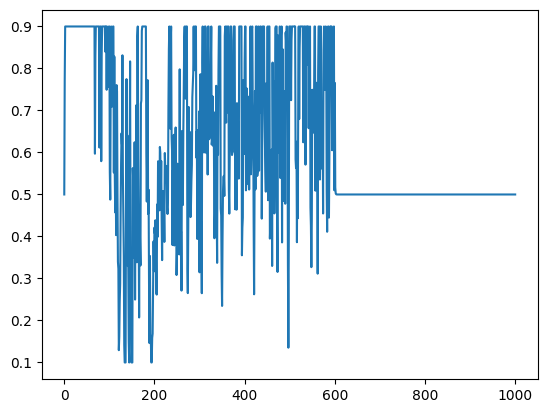

In [10]:
y_axis = a.history_smp[:,9] 
x_axis= np.arange(len(y_axis))

import matplotlib.pyplot as plt 

plt.plot(x_axis, y_axis) 
plt.show()

In [20]:
CEC17_benchmark.get_10tasks_benchmark()[0]

In [14]:
a = loadModel("RESULTS/result/GECCO20/check/SMP_MFEA_SBX_230523_1400/2.mso", ls_tasks= WCCI22_benchmark.get_50tasks_benchmark(2)[0], set_attribute= True)

In [27]:
a = loadModel("./RESULTS/result/GECCO20/check/SMP_MFEA_SBX_230523_1400/multiparent.mso", ls_tasks= CEC17_benchmark.get_10tasks_benchmark()[0], set_attribute= True)

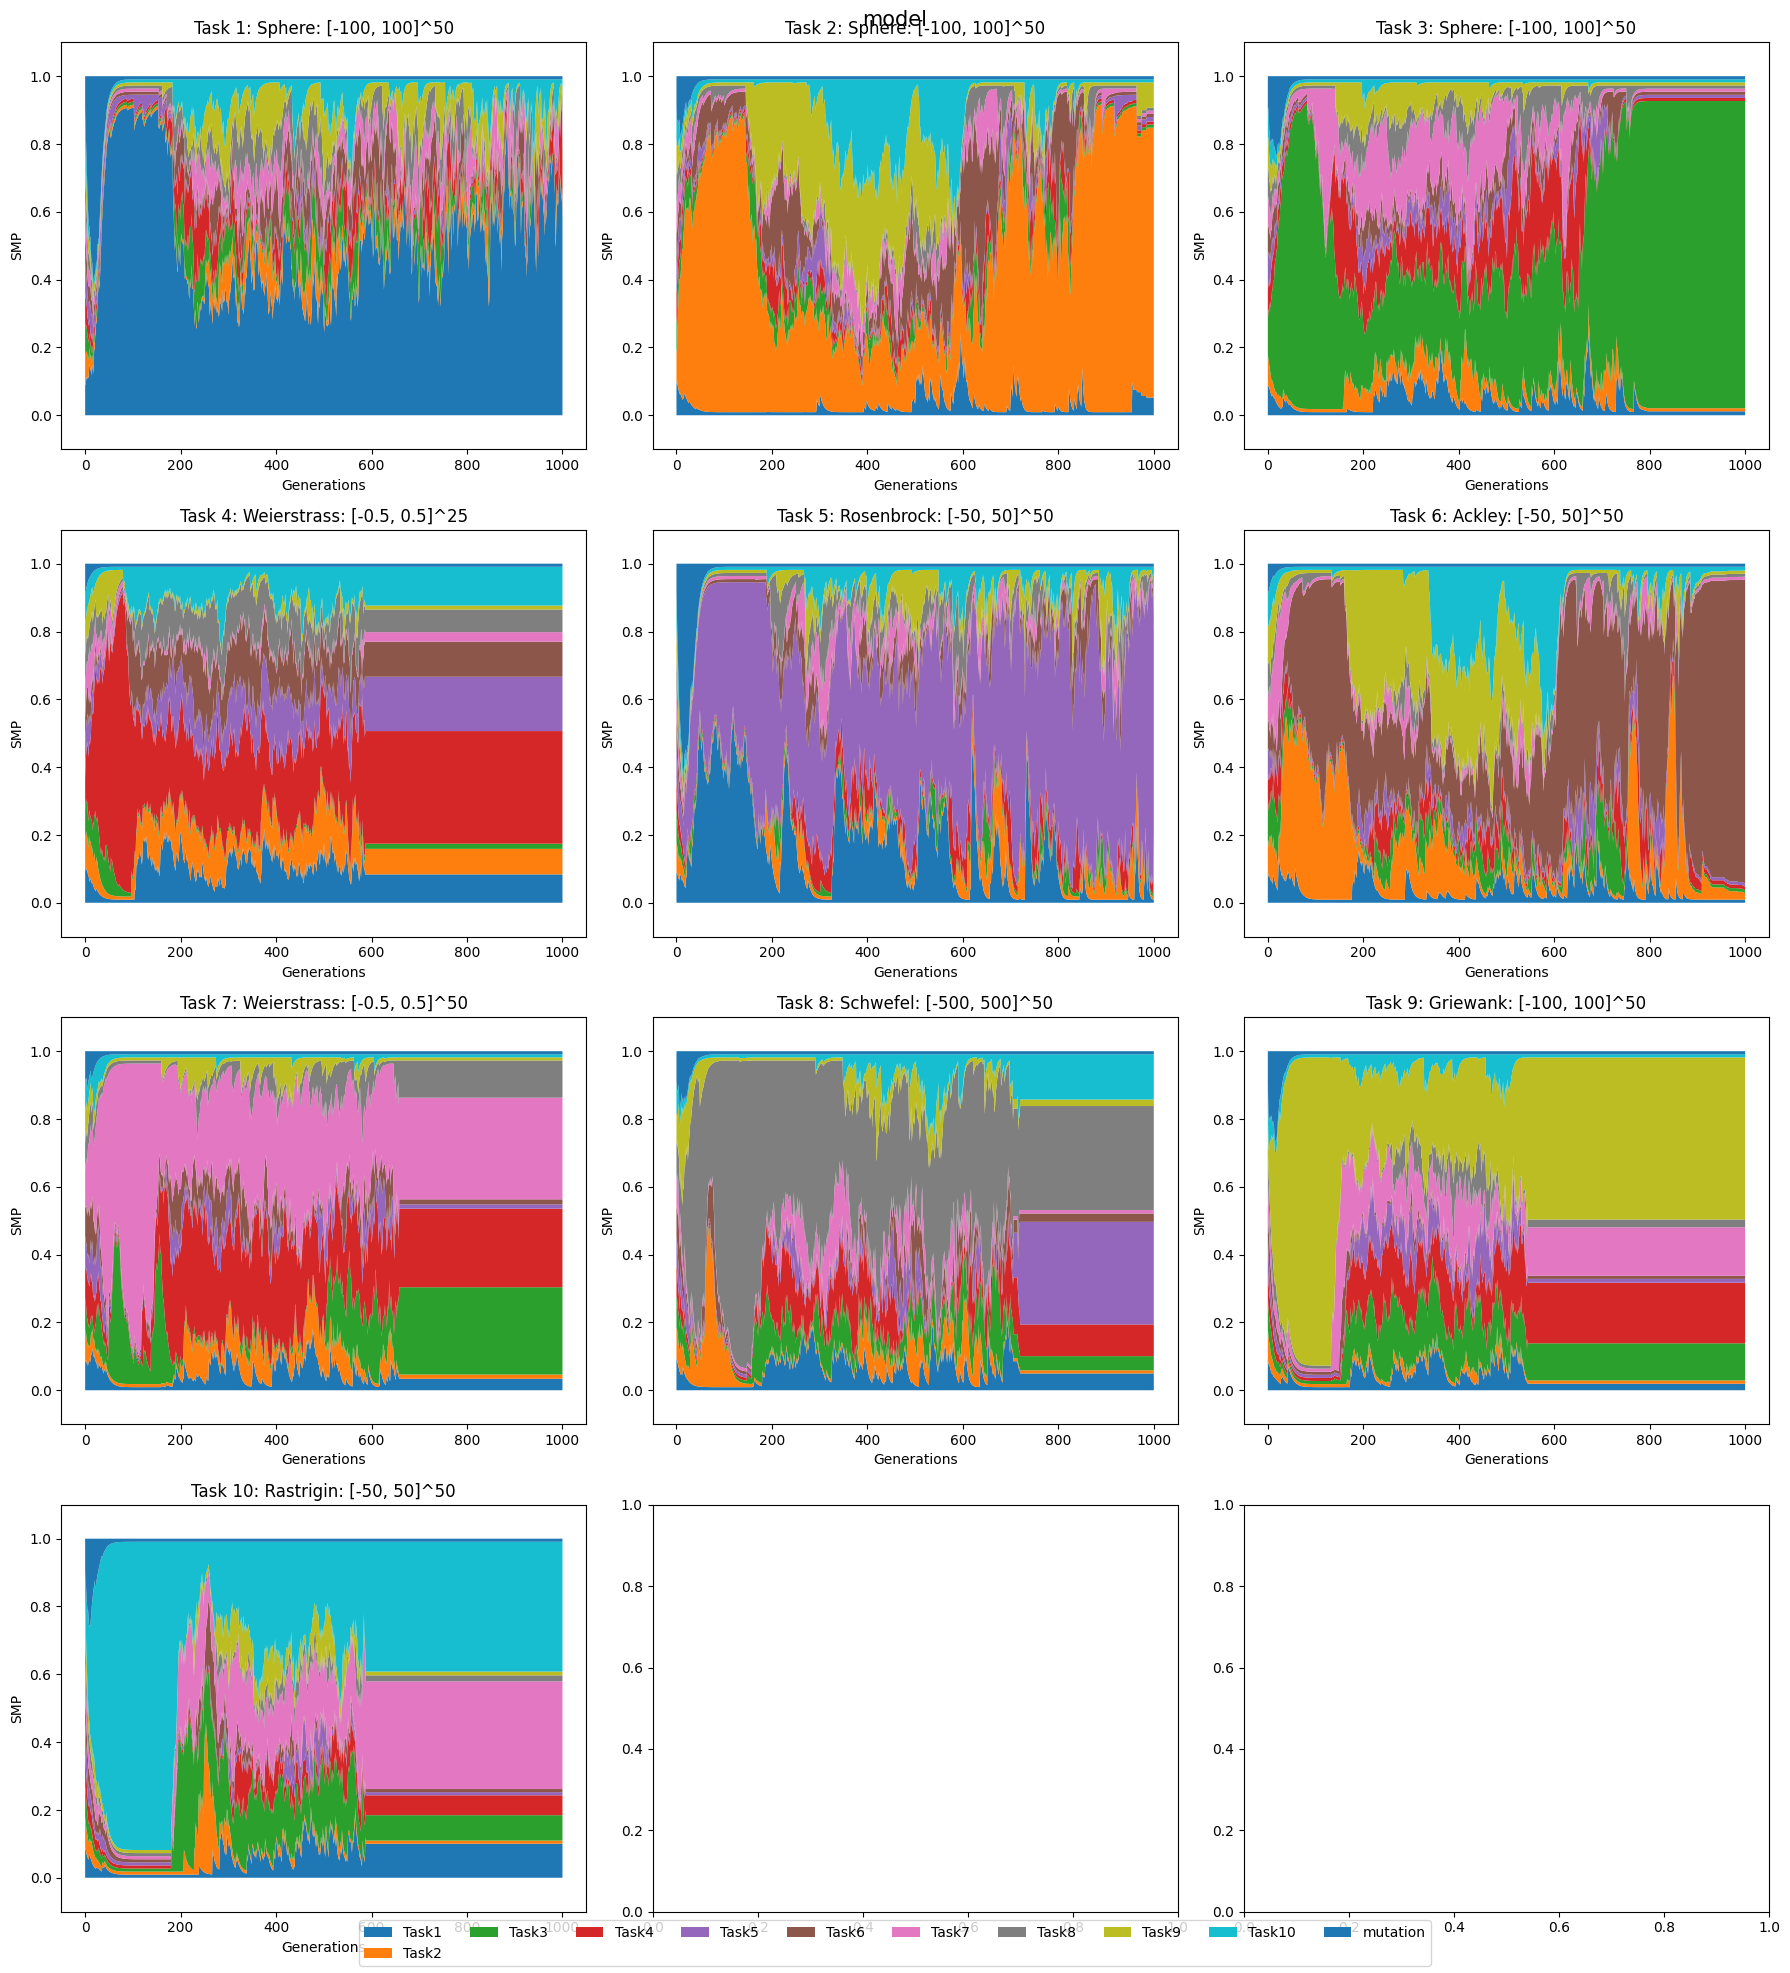

In [28]:
a.ls_model[0].render_smp()

## Analsys

In [1]:
import numpy as np 
average_success = np.load("./avarage_success.npy")
count_success = np.load("./ls_count_success.npy")
count_delta = np.load("./ls_count_Delta.npy")

In [ ]:
idx = 200 

In [10]:
loop = True 

steps = 50 
idx_task =5
idx = 500
print(len(average_success))
print(average_success[idx: idx + steps, idx_task])


2037
[[0.05263157 0.03333332]
 [0.         0.03571427]
 [0.03571427 0.11764702]
 [0.05555554 0.14285709]
 [0.05882351 0.03333332]
 [0.         0.03571427]
 [0.0833333  0.04347825]
 [0.10714282 0.08333331]
 [0.12499996 0.12499996]
 [0.04545452 0.05263157]
 [0.04999999 0.        ]
 [0.13157891 0.03571427]
 [0.06249998 0.04166665]
 [0.06521738 0.14999993]
 [0.07999998 0.02941176]
 [0.05999999 0.        ]
 [0.05357142 0.        ]
 [0.06666666 0.07142852]
 [0.01785714 0.05555552]
 [0.07692306 0.05555552]
 [0.06666666 0.        ]
 [0.04545454 0.        ]
 [0.05172413 0.12499984]
 [0.11538459 0.        ]
 [0.03703703 0.09999995]
 [0.11764702 0.        ]
 [0.04347825 0.        ]
 [0.03125    0.        ]
 [0.12962961 0.        ]
 [0.05172413 0.2999997 ]
 [0.09259258 0.04999998]
 [0.0869565  0.        ]
 [0.02173913 0.        ]
 [0.19999996 0.        ]
 [0.27777773 0.08333326]
 [0.22727268 0.24999969]
 [0.30357137 0.        ]
 [0.23999995 0.37499977]
 [0.30357137 0.24999969]
 [0.37096768 0.21428

In [15]:
import numpy as np
average_rate_success_das =  np.load("./avarage_success._w_Das.npy") 
average_rate_success_no_das = np.load("./avarage_success_sbx_wo_Das.npy")
average_multi_parent = np.load("./avarage_success.npy")

In [2]:
print(len(average_rate_success_das))
print(len(average_rate_success_no_das))
print(len(average_multi_parent))

2037
2037
2037


In [95]:
a = np.random.rand(224, 224, 3)
print(np.sum(a[2, :, 1])) 

116.73284953846434


In [97]:
from pyMSOO.utils.numba_utils import numba_randomchoice_w_prob

a = np.array([0.7, 0.2, 0.1])
print(numba_randomchoice_w_prob(a))

0


In [107]:
np.random.choice(a, replace= False)

0.2

In [14]:
avg_success_w_DaS = np.load("./avarage_success._w_Das.npy")
ls_count_delta_w_DaS = np.load("./ls_count_Delta.npy")
ls_count_success_w_Das = np.load("./ls_count_success.npy")

In [7]:
avg_success_multiparent = np.load("./avarage_success_multiparent.npy")
ls_count_delta_multiparent= np.load("./ls_count_Delta_multiparent.npy")
ls_count_success_multiparent = np.load("./ls_count_success_multiparent.npy")

In [66]:
print(np.sum(ls_count_delta_multiparent, axis=0)[4])
print(np.sum(ls_count_delta_w_DaS, axis= 0)[4])


[28432.  1018.  1104.   974. 59632.  1028.  1102.  1096.   878.  1048.
  3210.]
[30478.   924.   956.   908. 58754.   992.  1034.   980.  1010.  1144.
  2600.]


In [86]:
idx_task = 1
print(np.sum(np.sum(ls_count_delta_multiparent, axis=0)[idx_task]))

print(np.sum(np.sum(ls_count_delta_w_DaS, axis=0)[idx_task]))

99710.0
99742.0


In [21]:
idx_task = 9
print(np.sum(np.sum(ls_count_success_multiparent, axis=0)[idx_task]))

print(np.sum(np.sum(ls_count_success_w_Das, axis=0)[idx_task]))

10096.0
13034.0


In [20]:
idx = 200
steps = 1000
idx_task = 9
print(np.average(average_rate_success_das[idx:idx+steps], axis= 0)[idx_task])
# print(np.average(average_rate_success_no_das[idx:idx+steps], axis= 0)[idx_task])
print(np.average(average_multi_parent[idx:idx+steps], axis= 0)[idx_task])
# print(np.sum(np.average(average_multi_parent[idx:idx+steps], axis=0)[idx_task]) - np.average(average_multi_parent[idx:idx+steps], axis=0)[idx_task][idx_task])

[0.         0.03384008 0.1670369  0.         0.         0.02346375
 0.16643871 0.0005     0.         0.15331995 0.        ]
[0.0005     0.0592411  0.17994958 0.         0.00025    0.04556808
 0.16935831 0.0005     0.00091666 0.16779982 0.        ]


In [5]:
np.sum(np.average(average_multi_parent[idx:idx+100], axis=0))

0.9216917235680046

In [64]:
for i in range(1000):
    print(average_multi_parent[i][4].tolist())

[0.1999998000002, 0.0, 0.0, 0.16666638888935187, 0.2999997000003, 0.0, 0.0, 0.12499984375019532, 0.1428570408163994, 0.24999968750039064, 0.8999991000009]
[0.24999937500156252, 0.0, 0.12499984375019532, 0.0, 0.0, 0.0, 0.0, 0.33333277777870374, 0.0, 0.08333326388894677, 0.8571422448983965]
[0.16666652777789354, 0.0714285204081997, 0.0, 0.0, 0.16666638888935187, 0.0, 0.12499984375019532, 0.0, 0.0, 0.0, 0.8499995750002125]
[0.7499981250046875, 0.49999750001249993, 0.06249996093752441, 0.0, 0.1999998000002, 0.0, 0.0, 0.0999999000001, 0.0, 0.16666638888935187, 0.8529409256056101]
[0.24999968750039064, 0.16666638888935187, 0.0, 0.12499984375019532, 0.0, 0.0, 0.0, 0.12499984375019532, 0.0, 0.24999937500156252, 0.8076921523668937]
[0.24999937500156252, 0.16666638888935187, 0.0, 0.0, 0.2999997000003, 0.0, 0.0, 0.0, 0.49999750001249993, 0.0, 0.8124998307292018]
[0.16666652777789354, 0.0, 0.0, 0.0, 0.12499984375019532, 0.0, 0.0, 0.0, 0.0, 0.0, 0.7727270971074779]
[0.16666638888935187, 0.0, 0.0, 0

In [11]:
np.average(average_rate_success_no_das[0:100], axis= 0)[4]

array([0.15930887, 0.00749997, 0.00736108, 0.0035    , 0.14350754,
       0.00271428, 0.00416666, 0.00513888, 0.00749999, 0.        ,
       0.13226731])

In [ ]:
for i in range(len(a.ls_model)):
    print(a.ls_model[i].history_cost[-1])

## Test code

In [24]:
import numpy as np 
PCD_pa = np.array([
    [1, 1, 1, 1], 
    [0.9, 0.9, 0.1, 0.1], 
    [0.1, 0.1, 0.9, 0.1], 
    [0.5, 0.5, 0.1, 0.2],
    [0.1, 0.1, 0.2, 0.9]
])
skf_pb = 1 
skf_pa = 0 
pcd_pa_pb = PCD_pa[skf_pb].copy()
pcd_pa = PCD_pa.copy()

    
# take skf_pc 
## compute mse_los -> take loss max
random_vector = np.random.rand(4)

print(random_vector)
idx_transfer_ab = random_vector < pcd_pa_pb  # [1, 0, 0, 1] => 
print(idx_transfer_ab)
if np.sum((1 - idx_transfer_ab)) > 0: # ton tai chieu khong transfer
    pcd_pa[0] *= 0 
    mse_loss = np.sum((pcd_pa * (1 - idx_transfer_ab)), axis= 1) / np.sum((1 - idx_transfer_ab))
    print(mse_loss)
    skf_pc = np.argmax(mse_loss)
else: 
    skf_pc = None
print(skf_pc) 
print(mse_loss[skf_pc])

[0.35965859 0.81065703 0.80912596 0.94506824]
[ True  True  True False]
[0.  0.1 0.1 0.2 0.1]
3


In [2]:
skf_pc

2

In [31]:
import numpy as np 
x_en = "0.9 0.2 0.8 0.5 0.1 0.5 0.7 0.6 0.7 0.5".split(" ")
x_en = np.array(x_en, dtype= np.float64)
x_en = np.array(x_en)
lower_bound, upper_bound = -50, 50

x = x_en * (upper_bound - lower_bound) + lower_bound
print(x)
print(",".join([str(round(i, 2)) for i in x]))

[ 40. -30.  30.   0. -40.   0.  20.  10.  20.   0.]
40.0,-30.0,30.0,0.0,-40.0,0.0,20.0,10.0,20.0,0.0


In [13]:
x -= 1 

In [18]:
print(",".join([str(int(i)) for i in x]))

40,0,-80,0,-20,0,-60,80,40,20
